In [8]:
# import libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# generate synthetic data
np.random.seed(0)

In [10]:
# generating the random input data
x = 2*np.random.rand(100,1)

In [11]:
x

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304],
       [1.58345008],
       [1.05778984],
       [1.13608912],
       [1.85119328],
       [0.14207212],
       [0.1742586 ],
       [0.04043679],
       [1.66523969],
       [1.5563135 ],
       [1.7400243 ],
       [1.95723668],
       [1.59831713],
       [0.92295872],
       [1.56105835],
       [0.23654885],
       [1.27984204],
       [0.28670657],
       [1.88933783],
       [1.04369664],
       [0.82932388],
       [0.52911122],
       [1.54846738],
       [0.91230066],
       [1.1368679 ],
       [0.0375796 ],
       [1.23527099],
       [1.22419145],
       [1.23386799],
       [1.88749616],
       [1.3636406 ],
       [0.7190158 ],
       [0.87406391],
       [1.39526239],
       [0.12045094],
       [1.33353343],
       [1.34127574],
       [0.42076512],
       [0.257

In [12]:
# creating the target data
y = 4+3*x+np.random.randn(100,1) # y = 4+3x

In [13]:
y

array([[ 6.12773118],
       [ 9.19196269],
       [ 8.0822427 ],
       [ 5.73305541],
       [ 8.03018099],
       [ 9.77125385],
       [ 7.80430284],
       [ 9.17071317],
       [ 8.71122394],
       [ 7.35510084],
       [ 8.34717328],
       [ 8.39581459],
       [ 7.61654234],
       [10.53021887],
       [ 4.78258275],
       [ 5.22934897],
       [ 4.13181041],
       [10.78158957],
       [ 8.7958526 ],
       [ 9.62206225],
       [11.75486075],
       [ 7.44719232],
       [ 5.49839118],
       [ 9.65257177],
       [ 3.53652315],
       [ 9.78314731],
       [ 4.44650074],
       [ 8.92055869],
       [ 9.05403196],
       [ 7.96848643],
       [ 7.45489263],
       [ 9.55144679],
       [ 5.87567631],
       [ 9.32066865],
       [ 3.84473543],
       [ 8.50826938],
       [ 8.6198263 ],
       [ 7.54659389],
       [10.27656784],
       [ 9.01312847],
       [ 6.53347293],
       [ 5.52279093],
       [ 8.48402535],
       [ 5.68773873],
       [ 7.30603243],
       [ 7

In [14]:
# converting to PyTorch tensor
x_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y)

In [15]:
x_tensor

tensor([[1.0976],
        [1.4304],
        [1.2055],
        [1.0898],
        [0.8473],
        [1.2918],
        [0.8752],
        [1.7835],
        [1.9273],
        [0.7669],
        [1.5835],
        [1.0578],
        [1.1361],
        [1.8512],
        [0.1421],
        [0.1743],
        [0.0404],
        [1.6652],
        [1.5563],
        [1.7400],
        [1.9572],
        [1.5983],
        [0.9230],
        [1.5611],
        [0.2365],
        [1.2798],
        [0.2867],
        [1.8893],
        [1.0437],
        [0.8293],
        [0.5291],
        [1.5485],
        [0.9123],
        [1.1369],
        [0.0376],
        [1.2353],
        [1.2242],
        [1.2339],
        [1.8875],
        [1.3636],
        [0.7190],
        [0.8741],
        [1.3953],
        [0.1205],
        [1.3335],
        [1.3413],
        [0.4208],
        [0.2579],
        [0.6309],
        [0.7274],
        [1.1404],
        [0.8772],
        [1.9767],
        [0.2041],
        [0.4178],
        [0

In [16]:
y_tensor

tensor([[ 6.1277],
        [ 9.1920],
        [ 8.0822],
        [ 5.7331],
        [ 8.0302],
        [ 9.7713],
        [ 7.8043],
        [ 9.1707],
        [ 8.7112],
        [ 7.3551],
        [ 8.3472],
        [ 8.3958],
        [ 7.6165],
        [10.5302],
        [ 4.7826],
        [ 5.2293],
        [ 4.1318],
        [10.7816],
        [ 8.7959],
        [ 9.6221],
        [11.7549],
        [ 7.4472],
        [ 5.4984],
        [ 9.6526],
        [ 3.5365],
        [ 9.7831],
        [ 4.4465],
        [ 8.9206],
        [ 9.0540],
        [ 7.9685],
        [ 7.4549],
        [ 9.5514],
        [ 5.8757],
        [ 9.3207],
        [ 3.8447],
        [ 8.5083],
        [ 8.6198],
        [ 7.5466],
        [10.2766],
        [ 9.0131],
        [ 6.5335],
        [ 5.5228],
        [ 8.4840],
        [ 5.6877],
        [ 7.3060],
        [ 7.8742],
        [ 4.8271],
        [ 6.6228],
        [ 6.5649],
        [ 6.5897],
        [ 6.6513],
        [ 7.1709],
        [ 9.

In [17]:
# Define linear regression model
class LinearRegresion(nn.Module):
    def __init__(self):
        super(LinearRegresion, self).__init__()
        self.linear = nn.Linear(1,1) # 1 input feature,1 output feature
        
    def forward(self,x):
        return self.linear(x)

In [18]:
model = LinearRegresion()

In [19]:
# setup loss function & optimizer
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [21]:
# training the model
num_epochs = 1000

for epoch in range(num_epochs):
    #forward pass: compute the predicted y value by passing x to the model
    y_pred = model(x_tensor)
    
    #compute and print loss
    loss = loss_func(y_pred,y_tensor)
    
    # zero gradients, backward pass, optimizer setup
    optimizer.zero_grad() # zero the gradients
    loss.backward() # backward pass(compute gradients)
    optimizer.step() # update weights
    
    if (epoch + 1 ) %  100 == 0: # print every 100 epochs
        print(f'Epoch[{epoch + 1}/ num_epochs], loss: {loss.item():.4f}')

Epoch[100/ num_epochs], loss: 1.0328
Epoch[200/ num_epochs], loss: 1.0079
Epoch[300/ num_epochs], loss: 1.0006
Epoch[400/ num_epochs], loss: 0.9967
Epoch[500/ num_epochs], loss: 0.9947
Epoch[600/ num_epochs], loss: 0.9936
Epoch[700/ num_epochs], loss: 0.9931
Epoch[800/ num_epochs], loss: 0.9928
Epoch[900/ num_epochs], loss: 0.9926
Epoch[1000/ num_epochs], loss: 0.9925


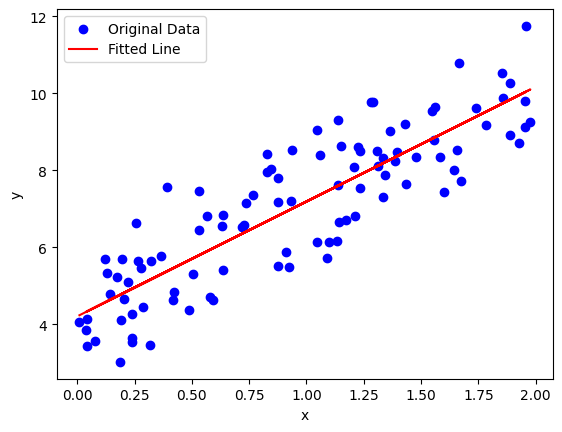

In [32]:
# plotting the result
predicted = model(x_tensor).detach().numpy() # get the predictions from the model
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, predicted, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

